In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as scp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from tslearn.clustering import TimeSeriesKMeans
import sklearn


In [4]:
filename = '/Users/coletamburri/Desktop/11aug2024_C_flarefile.npz'

In [5]:
res = np.load(filename)

In [6]:
nsteps = 91

In [7]:
flare_arr = res['arr_1']
times = res['arr_0']

In [76]:
caII_low = 570
caII_high = 720

In [77]:
hep_low = 750
hep_high = -1

In [78]:
obs_avg = np.mean(flare_arr[:,caII_low:caII_high,:],1)

In [79]:
obs_avg_hep = np.mean(flare_arr[:,hep_low:hep_high,:],1)

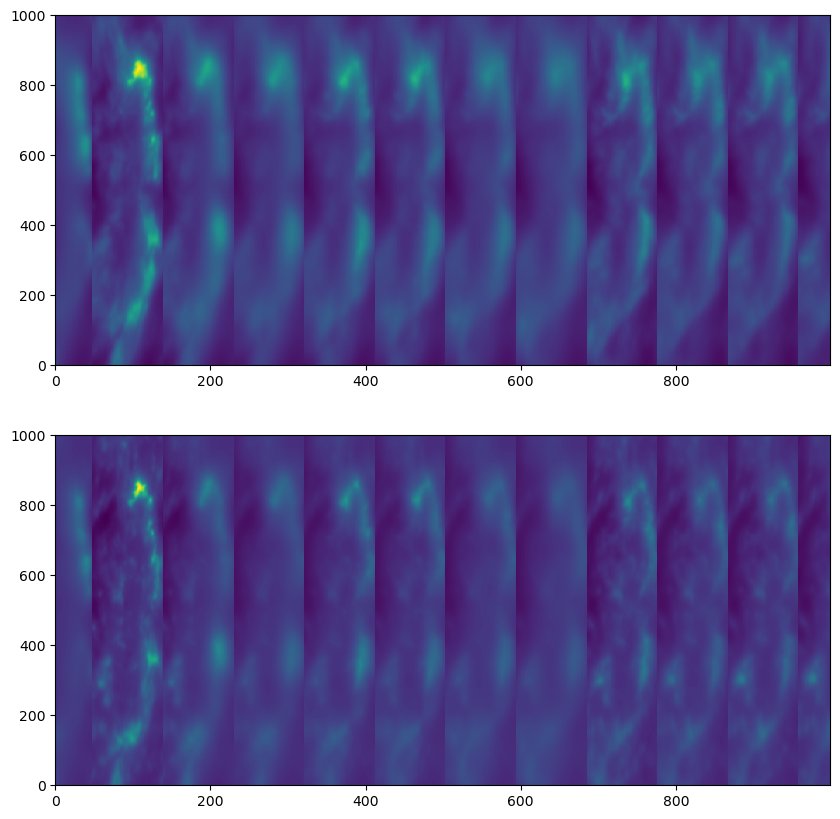

In [80]:
fig,[ax0,ax1] = plt.subplots(2,1,figsize=(10,10))
ax0.pcolormesh(np.transpose(obs_avg[:,500:1500]))
ax1.pcolormesh(np.transpose(obs_avg_hep[:,500:1500]))

In [81]:
firstframe_caII = obs_avg[48:48+nsteps,500:1500]

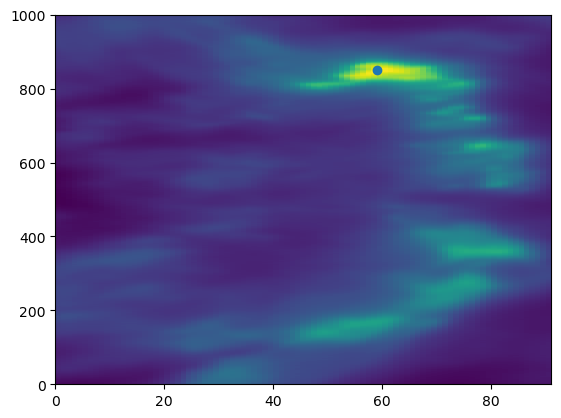

In [82]:
fig,ax=plt.subplots()
ax.pcolormesh(np.transpose(firstframe_caII))
ax.scatter(59,850)

In [221]:
print(np.max(firstframe_caII))
print(np.min(firstframe_caII))

4752649.800366204
354829.95849378716


In [222]:
(np.max(firstframe_caII) - masklim)/np.min(firstframe_caII)

7.194008677288447

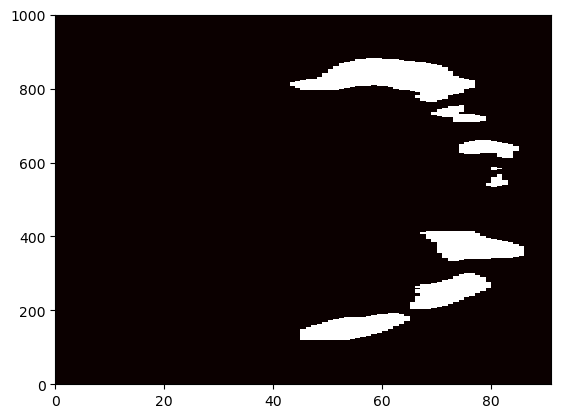

In [87]:
masklim = 2.2e6
firstmask = np.copy(firstframe_caII)
firstmask[firstmask < masklim] = 0
firstmask[firstmask > masklim] = 1
plt.pcolormesh(np.transpose(firstmask),cmap = 'hot')

In [88]:
maskinds = np.where(firstmask > .5)
x_mask = maskinds[0]
y_mask = maskinds[1]

In [89]:
caII_profiles = []
for i in range(len(x_mask)):
    caII_profiles.append(flare_arr[48+x_mask[i],caII_low:caII_high,48+y_mask[i]])

In [90]:
np.shape(caII_profiles)

(5654, 150)

In [91]:
def normalize(data):
    normarr=(data-np.nanmin(data))/(np.nanmax(data)-np.nanmin(data)) 
    return normarr

In [92]:
indrange = np.arange(205)
len(indrange)

205

In [93]:
norminds = normalize(indrange)

In [94]:
normprofiles_caII = []

for i in range(len(x_mask)):
    caII_norm = normalize(caII_profiles[i])

    normprofiles_caII.append(caII_norm)

In [95]:
len(normprofiles_caII)

5654

In [96]:
caIIprofiles_df = pd.DataFrame(np.transpose(normprofiles_caII))

In [97]:
caIIprofiles_df

,0,1,2,3,4,5,6,7,8,9,...,5644,5645,5646,5647,5648,5649,5650,5651,5652,5653
0,0.032108,0.042227,0.037053,0.025925,0.025742,0.044877,0.023712,0.033689,0.057038,0.038740,...,0.091364,0.113518,0.090555,0.092818,0.090565,0.060622,0.068264,0.093810,0.087000,0.062894
1,0.045681,0.035578,0.044777,0.033808,0.033849,0.034322,0.029673,0.020714,0.048084,0.045725,...,0.079261,0.113975,0.075997,0.086946,0.085405,0.075224,0.085017,0.070138,0.090070,0.083941
2,0.032934,0.035450,0.050568,0.032382,0.036821,0.031967,0.023700,0.014717,0.041147,0.052450,...,0.082303,0.111170,0.088945,0.084215,0.069370,0.069648,0.068105,0.064021,0.096757,0.066066
3,0.032159,0.037625,0.043024,0.030723,0.038219,0.038257,0.026916,0.035558,0.038047,0.037893,...,0.083489,0.105119,0.105095,0.083937,0.053690,0.070784,0.069880,0.066508,0.076000,0.067138
4,0.036673,0.024856,0.037420,0.036216,0.029234,0.028815,0.032188,0.041309,0.040198,0.046918,...,0.079170,0.092268,0.078055,0.077732,0.070606,0.069482,0.055050,0.058361,0.076767,0.066582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.040005,0.038725,0.052315,0.031205,0.030589,0.030397,0.026232,0.040159,0.036784,0.030814,...,0.064798,0.073031,0.058218,0.046221,0.057810,0.042566,0.036249,0.051985,0.060070,0.064478
146,0.044938,0.033331,0.041730,0.028133,0.030360,0.028914,0.040821,0.037374,0.039120,0.049985,...,0.062208,0.088847,0.061107,0.055678,0.056017,0.042096,0.047334,0.054772,0.078952,0.058391
147,0.041509,0.027110,0.038288,0.029092,0.032184,0.028650,0.031237,0.041359,0.039279,0.050573,...,0.081038,0.094295,0.071231,0.080167,0.055380,0.070098,0.072970,0.052203,0.068378,0.042132
148,0.039795,0.040501,0.040154,0.028557,0.030798,0.028939,0.030258,0.042502,0.040857,0.041827,...,0.080491,0.100547,0.068015,0.067752,0.056190,0.058926,0.074391,0.054301,0.059804,0.054180


In [98]:
X_train, X_test= train_test_split((normprofiles_caII))

In [193]:
km = TimeSeriesKMeans(n_clusters=10,metric='euclidean',max_iter=5,random_state=0).fit(normprofiles_caII)

In [194]:
np.shape(km.cluster_centers_)

(10, 150, 1)

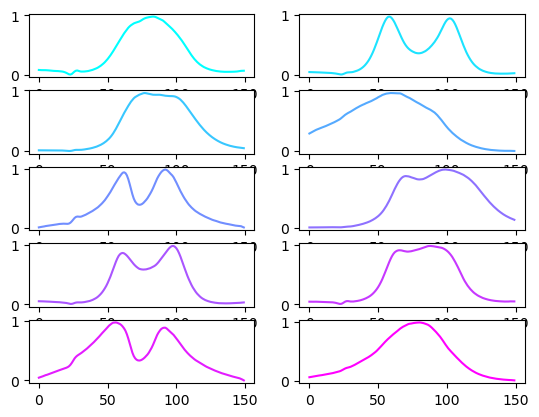

In [195]:
fig,ax=plt.subplots(5,2)
colors = plt.cm.cool(np.linspace(0,1,10))
for i in range(10):
    ax.flatten()[i].plot(range(150),km.cluster_centers_[i],color=colors[i])

In [196]:
groups = km.predict(normprofiles_caII)


/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 5654 1-dimensional timeseries
  warnings.warn(


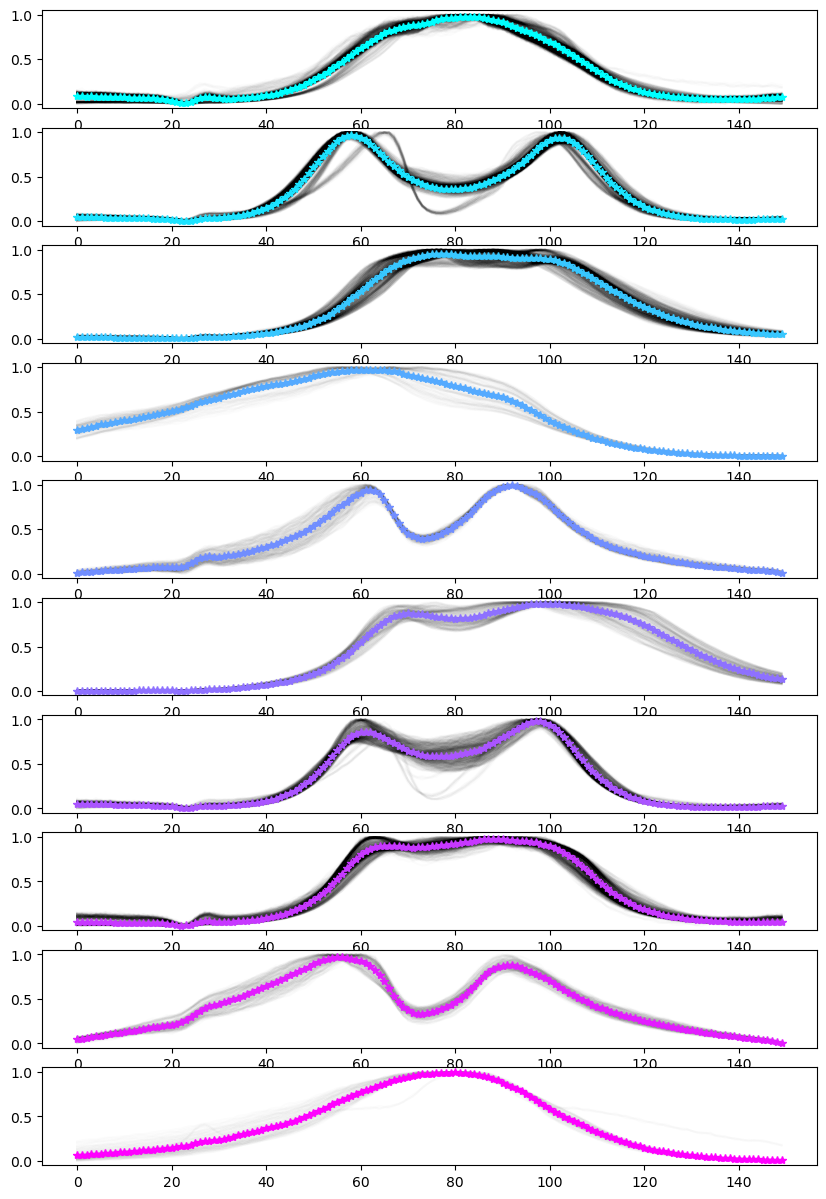

In [202]:
fig,ax=plt.subplots(10,1,figsize=(10,15))

for i in range(len(normprofiles_caII)):
    curve = normprofiles_caII[i]
    group = groups[i]
    
    ax.flatten()[group].plot(curve,alpha=0.01,color='black')

for i in range(10):
    ax.flatten()[i].plot(km.cluster_centers_[i],marker='*',color=colors[i])

In [198]:
labs = km.labels_
type(labs)

numpy.ndarray

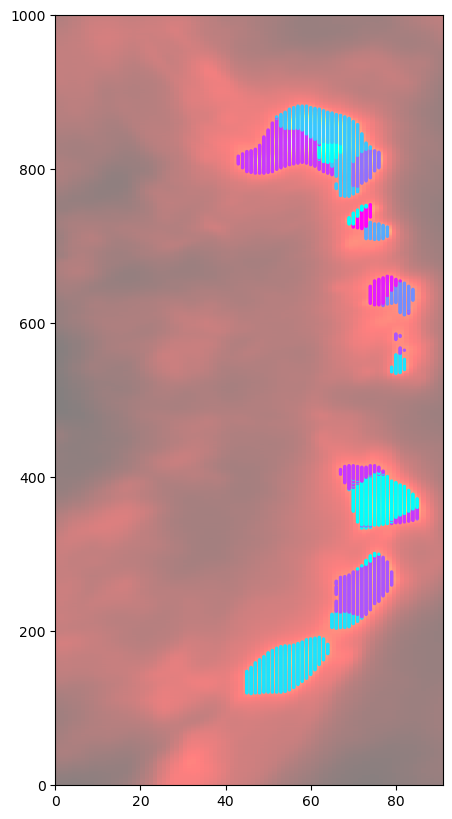

In [216]:
fig,ax=plt.subplots(figsize=(5,10))
ax.pcolormesh(np.transpose(firstframe_caII),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask,y_mask,2,color=colors[labs],alpha=1)

In [156]:
cluster_range = range(2,20)
silhouette_scores = []

for n_clusters in cluster_range:
    model = TimeSeriesKMeans(n_clusters=n_clusters,metric='euclidean',verbose=True)
    y_pred = model.fit_predict(normprofiles_caII)
    silhouette = sklearn.metrics.silhouette_score(normprofiles_caII,y_pred)
    silhouette_scores.append(silhouette)

3.058 --> 1.824 --> 1.807 --> 1.799 --> 1.797 --> 1.797 --> 1.797 --> 1.797 --> 1.797 --> 
1.790 --> 1.444 --> 1.438 --> 1.437 --> 1.437 --> 1.437 --> 1.437 --> 1.437 --> 1.437 --> 
1.457 --> 1.125 --> 1.095 --> 1.091 --> 1.091 --> 1.091 --> 1.091 --> 1.091 --> 1.091 --> 1.091 --> 
1.235 --> 0.799 --> 0.776 --> 0.774 --> 0.774 --> 0.774 --> 0.773 --> 0.773 --> 0.773 --> 0.773 --> 0.773 --> 0.773 --> 
1.025 --> 0.732 --> 0.724 --> 0.722 --> 0.721 --> 0.720 --> 0.719 --> 0.719 --> 0.719 --> 0.719 --> 
0.980 --> 0.701 --> 0.653 --> 0.637 --> 0.631 --> 0.628 --> 0.626 --> 0.625 --> 0.625 --> 0.625 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.624 --> 0.623 --> 0.623 --> 0.623 --> 0.623 --> 0.623 --> 0.622 --> 0.622 --> 0.621 --> 0.620 --> 0.620 --> 0.619 --> 0.619 --> 0.618 --> 0.618 --> 0.617 --> 0.617 --> 0.617 --> 0.617 --> 0.616 --> 0.616 --> 0.616 --> 0.616 --> 0.616 --> 0.616 --> 0.616 --> 0.616 --> 0.616 --> 0.616

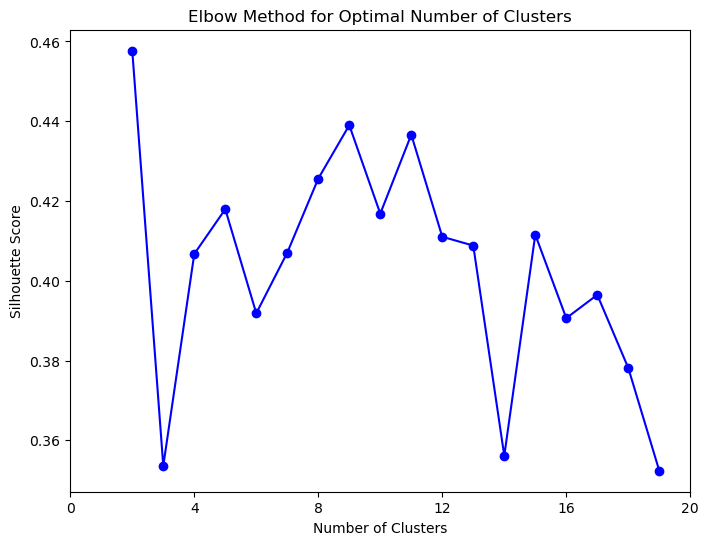

In [157]:
fig,ax=plt.subplots(figsize=(8, 6))
ax.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
ax.set_title('Elbow Method for Optimal Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

ax.set_xticks([0,4,8,12,16,20])

In [389]:
def kmeans_func(start,masknum,nsteps,startspace,endspace,obs_avg,flarearr,normalize,n_clusters,cutoff,line_low=caII_low,line_high=caII_high):
   
    frame_line = obs_avg[(start+(masknum)*nsteps):(start+(masknum+1)*nsteps),startspace:endspace]
    maxframe = np.max(frame_line)
    minframe = np.min(frame_line)

    masklim = cutoff*minframe

    mask = np.copy(frame_line)
    mask[mask < masklim] = 0
    mask[mask > masklim] = 1

    maskinds = np.where(mask > .5)
    x_mask = maskinds[0]
    y_mask = maskinds[1]

    line_profiles = []
    
    for i in range(len(x_mask)):
        line_profiles.append(flare_arr[(start*(masknum+1))+x_mask[i],line_low:line_high,(start*(masknum+1))+y_mask[i]])
        
    normprofiles_line = []

    for i in range(len(x_mask)):
        line_norm = normalize(line_profiles[i])
    
        normprofiles_line.append(line_norm)

    X_train, X_test= train_test_split((normprofiles_line))

    km = TimeSeriesKMeans(n_clusters=n_clusters,metric='euclidean',max_iter=5,random_state=0).fit(normprofiles_line)

    groups = km.predict(normprofiles_line)
                       
    labs = km.labels_
    
    return frame_line, mask, km, normprofiles_line, groups, labs, x_mask, y_mask

In [405]:
nframes = 10
startspace = 500
endspace = 1500
nsteps = 91
start = 48

cutoff0 = 6.5
cutoff1 = 4.5
cutoff2 = 3.5
cutoff3 = 4.5
cutoff4 = 4
cutoff5 = 4
cutoff6 = 3.5
cutoff7 = 5.5
cutoff8 = 4.5
cutoff9 = 4.5

n_clusters0 = 10
n_clusters1 = 4
n_clusters2 = 4
n_clusters3 = 3
n_clusters4 = 2
n_clusters5 = 4
n_clusters6 = 5
n_clusters7 = 4
n_clusters8 = 4
n_clusters9 = 4

frame_caII0, mask0, km0, normprofiles_caII0, groups0, labs0, x_mask0, y_mask0 = kmeans_func(start,0,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters0,cutoff0)
frame_caII1, mask1, km1, normprofiles_caII1, groups1, labs1, x_mask1, y_mask1 = kmeans_func(start,1,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters1,cutoff1)
frame_caII2, mask2, km2, normprofiles_caII2, groups2, labs2, x_mask2, y_mask2 = kmeans_func(start,2,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters2,cutoff2)
frame_caII3, mask3, km3, normprofiles_caII3, groups3, labs3, x_mask3, y_mask3 = kmeans_func(start,3,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters3,cutoff3)
frame_caII4, mask4, km4, normprofiles_caII4, groups4, labs4, x_mask4, y_mask4 = kmeans_func(start,4,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters4,cutoff4)
frame_caII5, mask5, km5, normprofiles_caII5, groups5, labs5, x_mask5, y_mask5 = kmeans_func(start,5,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters5,cutoff5)
frame_caII6, mask6, km6, normprofiles_caII6, groups6, labs6, x_mask6, y_mask6 = kmeans_func(start,6,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters6,cutoff6)
frame_caII7, mask7, km7, normprofiles_caII7, groups7, labs7, x_mask7, y_mask7 = kmeans_func(start,7,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters7,cutoff7)
frame_caII8, mask8, km8, normprofiles_caII8, groups8, labs8, x_mask8, y_mask8 = kmeans_func(start,8,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters8,cutoff8)
frame_caII9, mask9, km9, normprofiles_caII9, groups9, labs9, x_mask9, y_mask9 = kmeans_func(start,9,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters9,cutoff9)

/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 4657 1-dimensional timeseries
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 6440 1-dimensional timeseries
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 11260 1-dimensional timeseries
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 8154 1-dimensional timeseries
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 8188 1-dimensional timeseries
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Ass

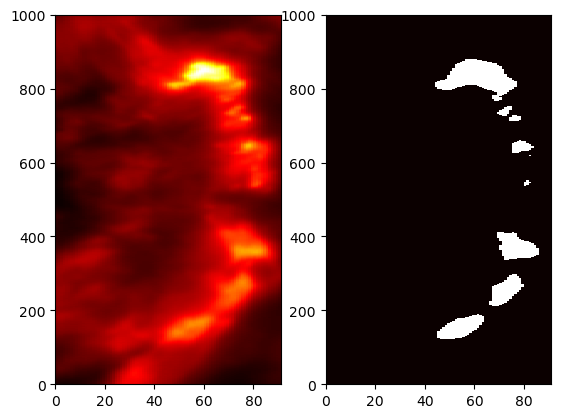

In [406]:
# for frame0
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII0),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask0),cmap = 'hot')

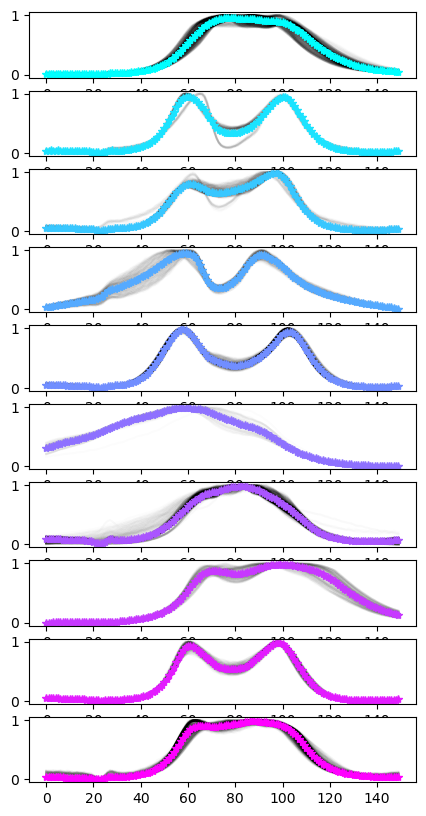

In [407]:
fig,ax=plt.subplots(n_clusters0,1,figsize=(5,10))

for i in range(len(normprofiles_caII0)):
    curve0 = normprofiles_caII0[i]
    group0 = groups0[i]
    
    ax.flatten()[group0].plot(curve0,alpha=0.01,color='black')

for i in range(n_clusters0):
    ax.flatten()[i].plot(km0.cluster_centers_[i],marker='*',color=colors[i])

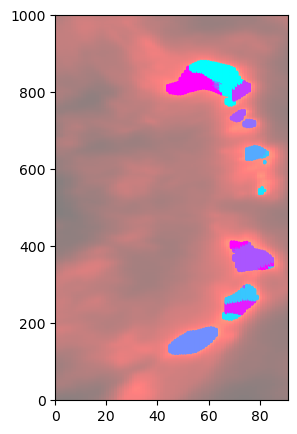

In [408]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII0),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask0,y_mask0,2,color=colors[labs0],alpha=1)

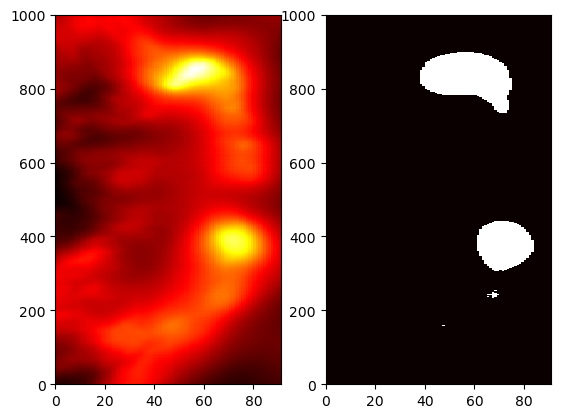

In [342]:
# for frame1
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII1),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask1),cmap = 'hot')

IndexError: index 4 is out of bounds for axis 0 with size 4

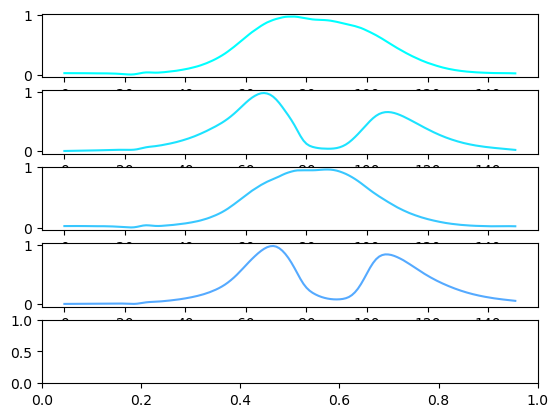

In [343]:
fig,ax=plt.subplots(5,1)
colors = plt.cm.cool(np.linspace(0,1,10))
for i in range(5):
    ax.flatten()[i].plot(range(150),km1.cluster_centers_[i],color=colors[i])

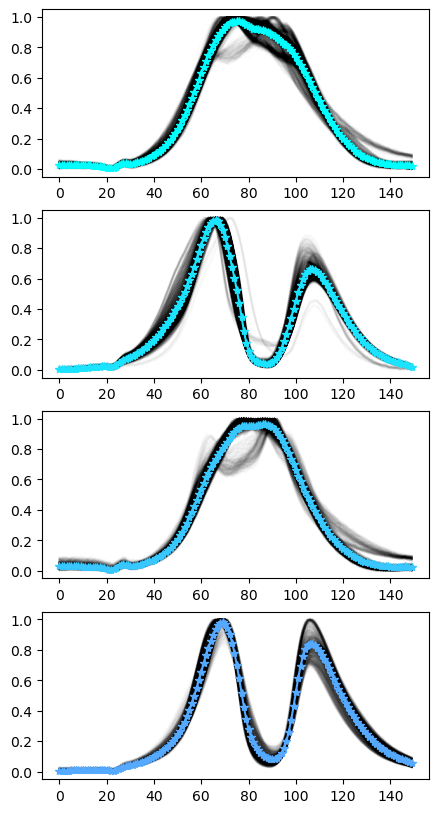

In [357]:
fig,ax=plt.subplots(n_clusters1,1,figsize=(5,10))

for i in range(len(normprofiles_caII1)):
    curve1 = normprofiles_caII1[i]
    group1 = groups1[i]
    
    ax.flatten()[group1].plot(curve1,alpha=0.01,color='black')

for i in range(n_clusters1):
    ax.flatten()[i].plot(km1.cluster_centers_[i],marker='*',color=colors[i])

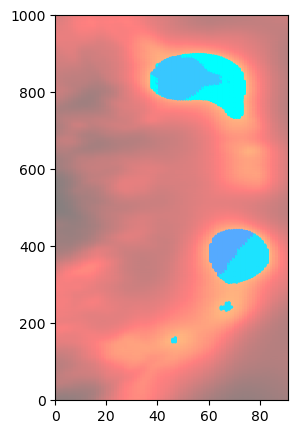

In [358]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII1),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask1,y_mask1,2,color=colors[labs1],alpha=1)

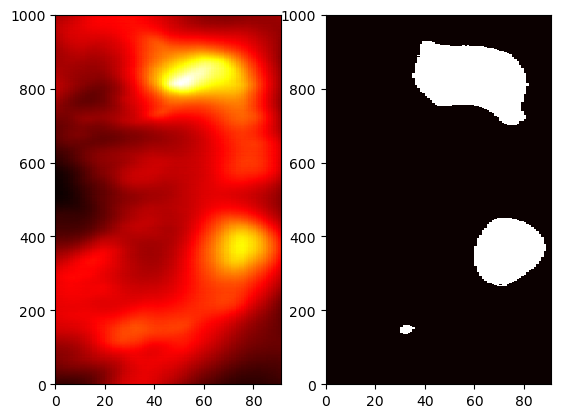

In [359]:
# for frame2
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII2),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask2),cmap = 'hot')


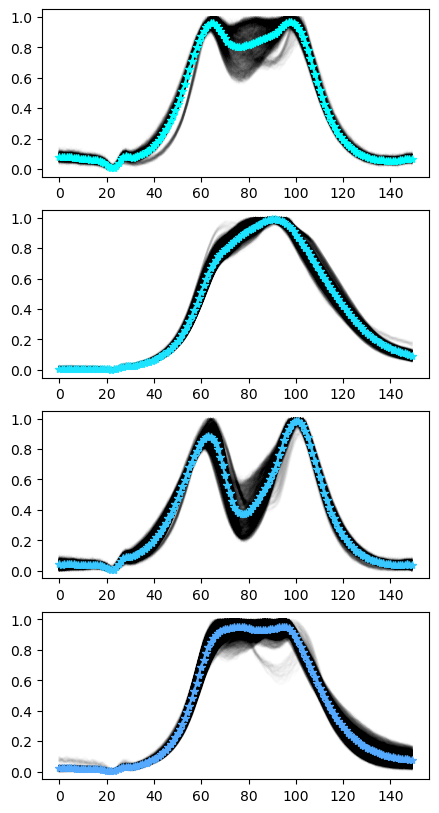

In [360]:
fig,ax=plt.subplots(n_clusters2,1,figsize=(5,10))

for i in range(len(normprofiles_caII2)):
    curve2 = normprofiles_caII2[i]
    group2 = groups2[i]
    
    ax.flatten()[group2].plot(curve2,alpha=0.01,color='black')

for i in range(n_clusters2):
    ax.flatten()[i].plot(km2.cluster_centers_[i],marker='*',color=colors[i])

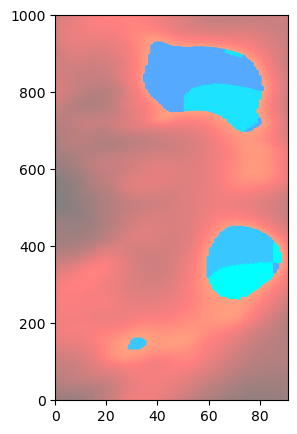

In [361]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII2),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask2,y_mask2,2,color=colors[labs2],alpha=1)

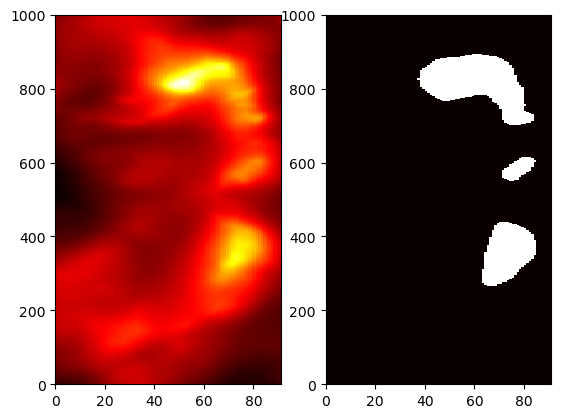

In [362]:
# for frame3
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII3),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask3),cmap = 'hot')


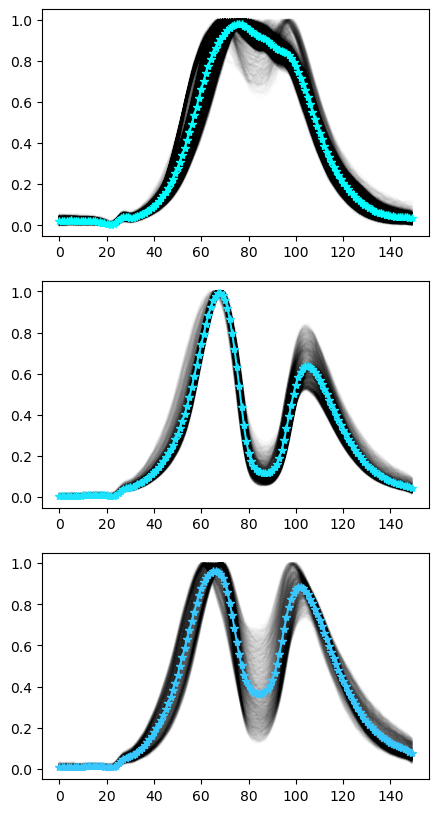

In [363]:
fig,ax=plt.subplots(n_clusters3,1,figsize=(5,10))

for i in range(len(normprofiles_caII3)):
    curve3 = normprofiles_caII3[i]
    group3 = groups3[i]
    
    ax.flatten()[group3].plot(curve3,alpha=0.01,color='black')

for i in range(n_clusters3):
    ax.flatten()[i].plot(km3.cluster_centers_[i],marker='*',color=colors[i])

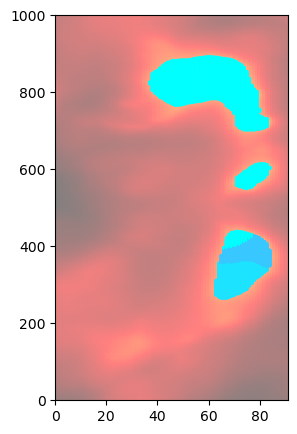

In [364]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII3),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask3,y_mask3,2,color=colors[labs3],alpha=1)

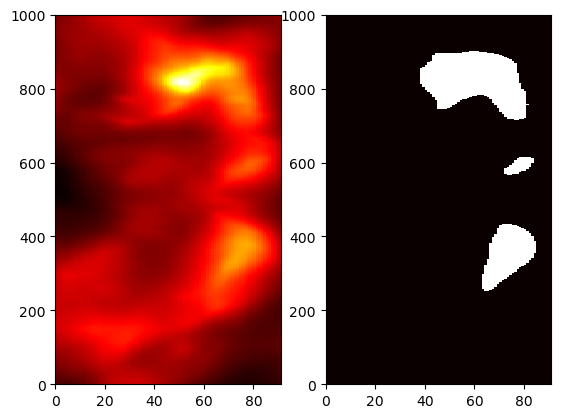

In [365]:
# for frame4
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII4),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask4),cmap = 'hot')

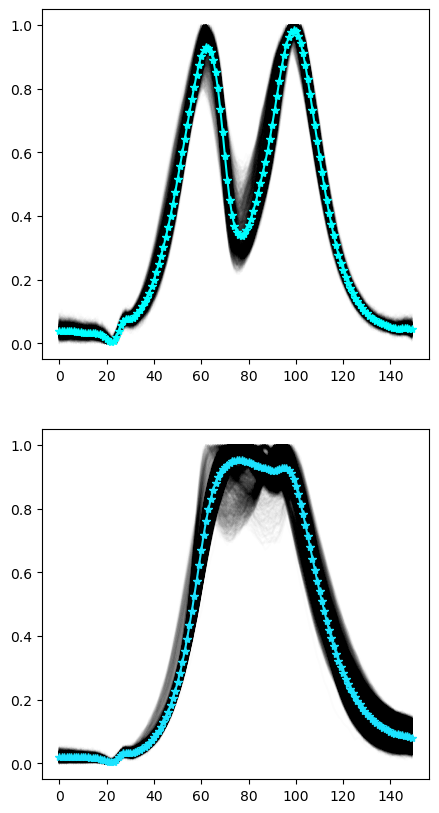

In [366]:
fig,ax=plt.subplots(n_clusters4,1,figsize=(5,10))

for i in range(len(normprofiles_caII4)):
    curve4 = normprofiles_caII4[i]
    group4 = groups4[i]
    
    ax.flatten()[group4].plot(curve4,alpha=0.01,color='black')

for i in range(n_clusters4):
    ax.flatten()[i].plot(km4.cluster_centers_[i],marker='*',color=colors[i])

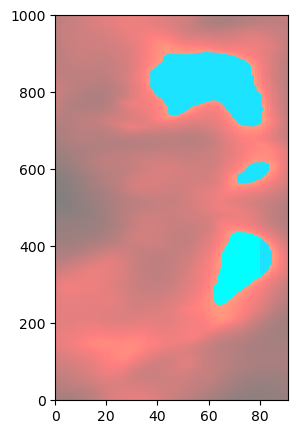

In [367]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII4),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask4,y_mask4,2,color=colors[labs4],alpha=1)

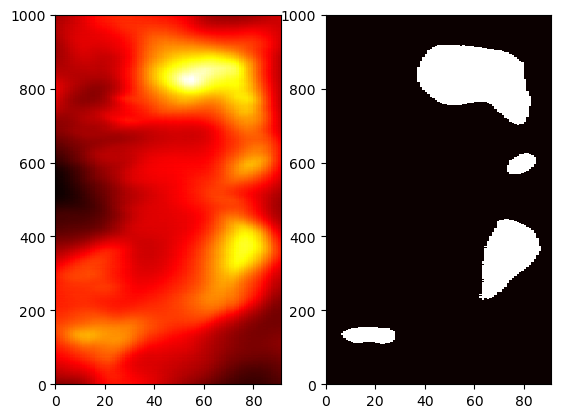

In [368]:
# for frame5
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII5),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask5),cmap = 'hot')

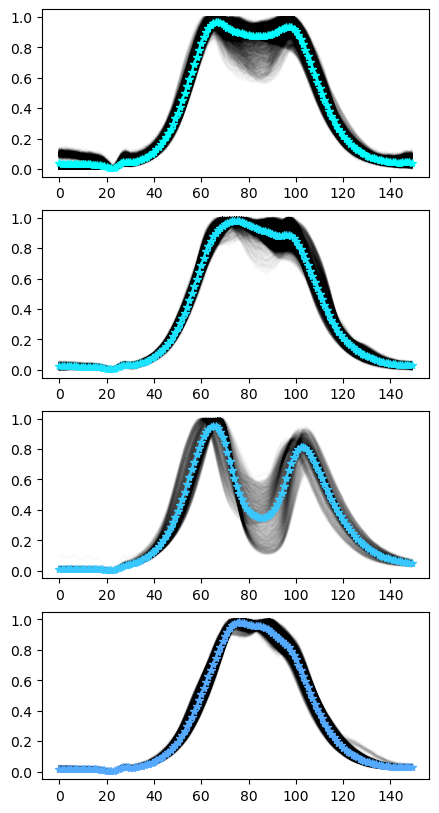

In [369]:
fig,ax=plt.subplots(n_clusters5,1,figsize=(5,10))

for i in range(len(normprofiles_caII5)):
    curve5 = normprofiles_caII5[i]
    group5 = groups5[i]
    
    ax.flatten()[group5].plot(curve5,alpha=0.01,color='black')

for i in range(n_clusters5):
    ax.flatten()[i].plot(km5.cluster_centers_[i],marker='*',color=colors[i])

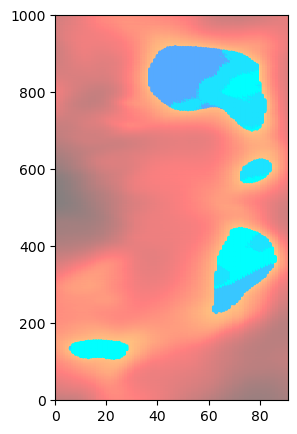

In [370]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII5),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask5,y_mask5,2,color=colors[labs5],alpha=1)

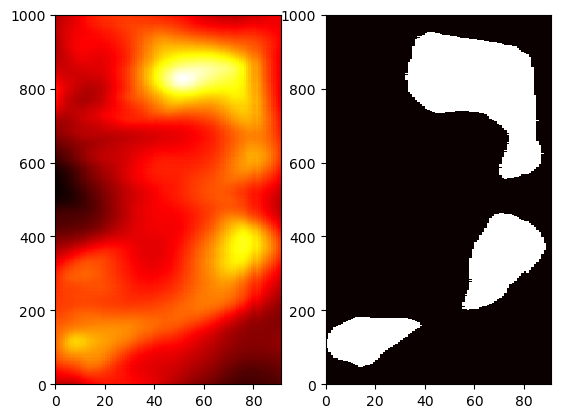

In [371]:
# for frame6
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII6),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask6),cmap = 'hot')

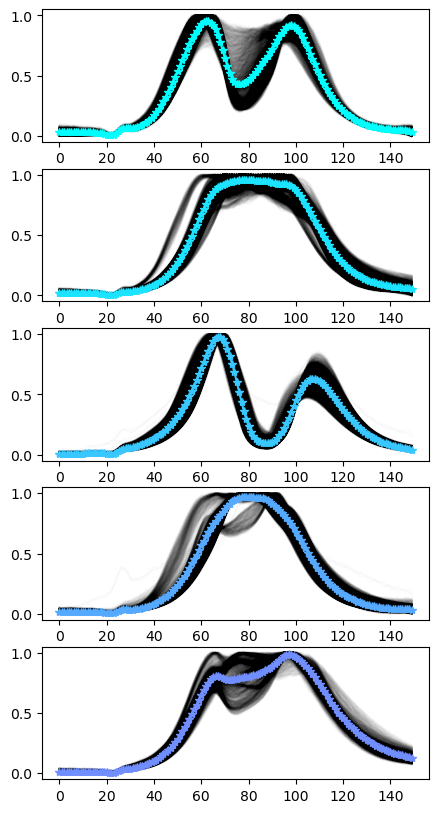

In [372]:
fig,ax=plt.subplots(n_clusters6,1,figsize=(5,10))

for i in range(len(normprofiles_caII6)):
    curve6 = normprofiles_caII6[i]
    group6 = groups6[i]
    
    ax.flatten()[group6].plot(curve6,alpha=0.01,color='black')

for i in range(n_clusters6):
    ax.flatten()[i].plot(km6.cluster_centers_[i],marker='*',color=colors[i])

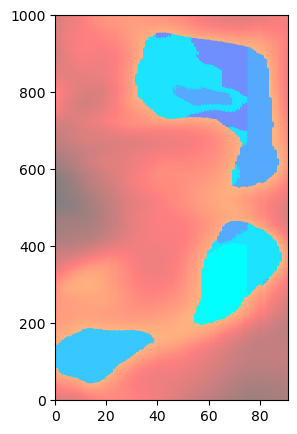

In [373]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII6),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask6,y_mask6,2,color=colors[labs6],alpha=1)

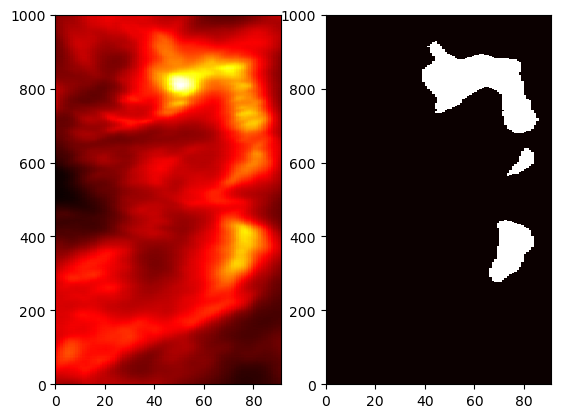

In [374]:
# for frame 7
# for frame1
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII7),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask7),cmap = 'hot')

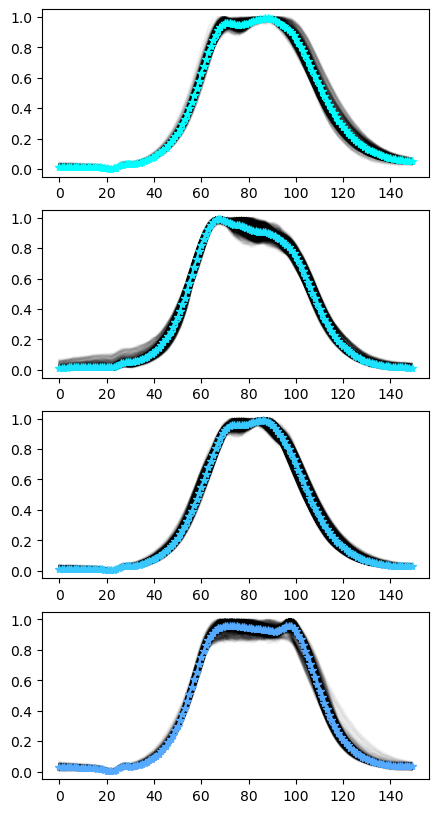

In [375]:
fig,ax=plt.subplots(n_clusters7,1,figsize=(5,10))

for i in range(len(normprofiles_caII7)):
    curve7 = normprofiles_caII7[i]
    group7 = groups7[i]
    
    ax.flatten()[group7].plot(curve7,alpha=0.01,color='black')

for i in range(n_clusters7):
    ax.flatten()[i].plot(km7.cluster_centers_[i],marker='*',color=colors[i])

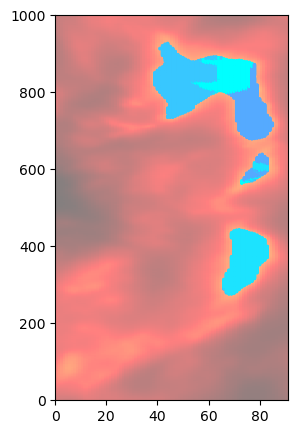

In [376]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII7),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask7,y_mask7,2,color=colors[labs7],alpha=1)

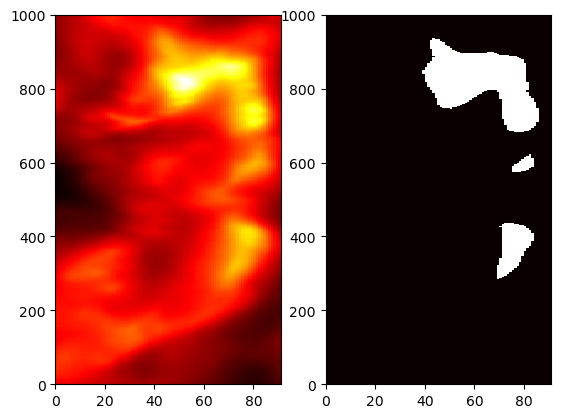

In [377]:
# for frame 8
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII8),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask8),cmap = 'hot')

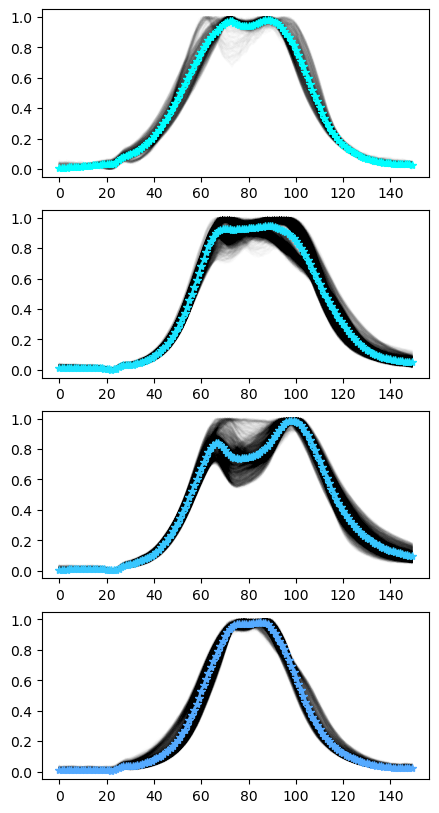

In [378]:
fig,ax=plt.subplots(n_clusters8,1,figsize=(5,10))

for i in range(len(normprofiles_caII8)):
    curve8 = normprofiles_caII8[i]
    group8 = groups8[i]
    
    ax.flatten()[group8].plot(curve8,alpha=0.01,color='black')

for i in range(n_clusters7):
    ax.flatten()[i].plot(km8.cluster_centers_[i],marker='*',color=colors[i])

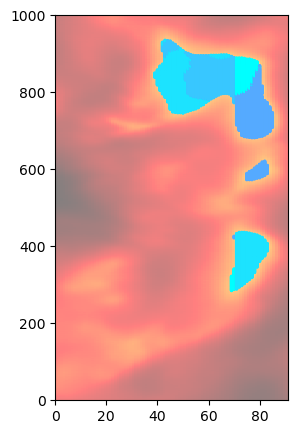

In [379]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII8),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask8,y_mask8,2,color=colors[labs8],alpha=1)

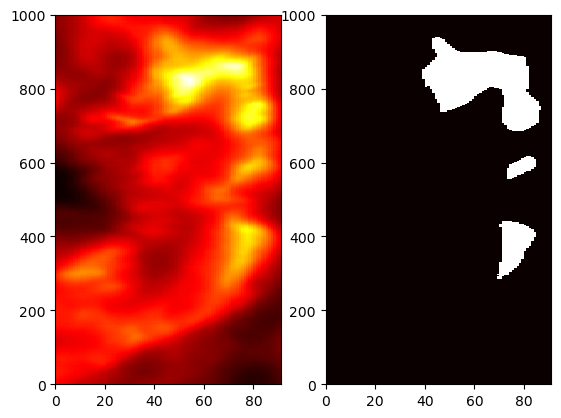

In [380]:
# for frame 9
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_caII9),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask9),cmap = 'hot')

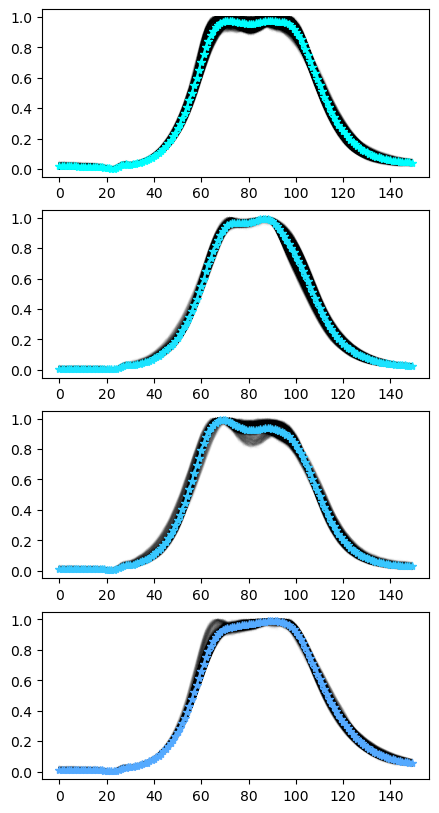

In [381]:
fig,ax=plt.subplots(n_clusters9,1,figsize=(5,10))

for i in range(len(normprofiles_caII9)):
    curve9 = normprofiles_caII9[i]
    group9 = groups9[i]
    
    ax.flatten()[group9].plot(curve9,alpha=0.01,color='black')

for i in range(n_clusters9):
    ax.flatten()[i].plot(km9.cluster_centers_[i],marker='*',color=colors[i])

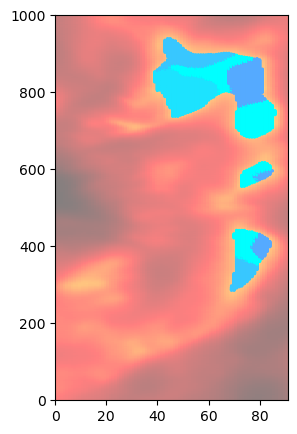

In [382]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_caII9),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask9,y_mask9,2,color=colors[labs9],alpha=1)

In [419]:
n_clusters_hep0 = 7
cutoff0_hep = cutoff0 #keep the same as Ca II
hep_low = 750
hep_high = 870
# frame0, hepsilon
frame_hep0, mask_hep0, km_hep0, normprofiles_hep0, groups_hep0, labs_hep0, x_mask_hep0, y_mask_hep0 = kmeans_func(start,0,nsteps,startspace,endspace,
                                             obs_avg,flare_arr,normalize,n_clusters_hep0,cutoff0_hep,line_low=hep_low,line_high=hep_high)

/opt/anaconda3/lib/python3.12/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 4657 1-dimensional timeseries
  warnings.warn(


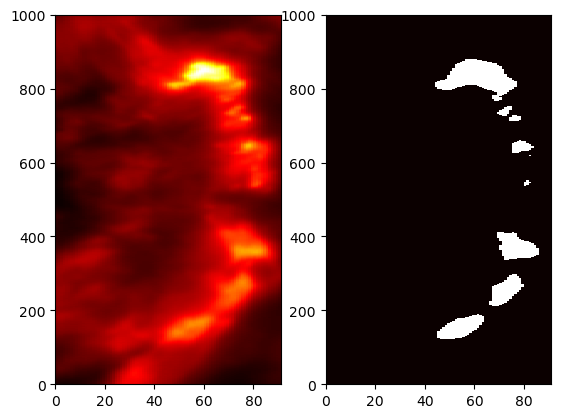

In [420]:
# for frame 0
fig,[ax0,ax1] = plt.subplots(1,2)
ax0.pcolormesh(np.transpose(frame_hep0),cmap = 'hot')
ax1.pcolormesh(np.transpose(mask_hep0),cmap = 'hot')

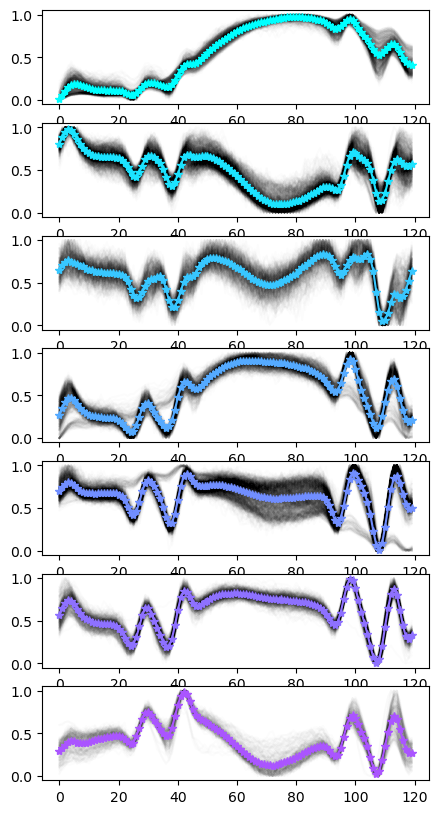

In [421]:
fig,ax=plt.subplots(n_clusters_hep0,1,figsize=(5,10))

for i in range(len(normprofiles_hep0)):
    curve_hep0 = normprofiles_hep0[i]
    group_hep0 = groups_hep0[i]
    
    ax.flatten()[group_hep0].plot(curve_hep0,alpha=0.01,color='black')

for i in range(n_clusters_hep0):
    ax.flatten()[i].plot(km_hep0.cluster_centers_[i],marker='*',color=colors[i])

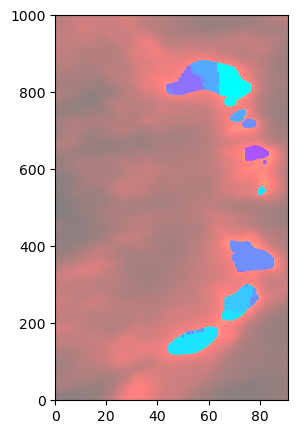

In [422]:
fig,ax=plt.subplots(figsize=(3,5))
ax.pcolormesh(np.transpose(frame_hep0),cmap = 'hot',alpha=0.5)
ax.scatter(x_mask_hep0,y_mask_hep0,2,color=colors[labs_hep0],alpha=1)